### Required:
- python
- pandas
- jupyter
- notebook
- matplotlib
- dtaidistance

__Author: Utpal Kumar @Institute of Earth Sciences, Academia Sinica__

In [1]:
from dtwclustering.dtw_analysis import dtw_signal_pairs, dtw_clustering
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from dtaidistance import dtw
%matplotlib inline 

# default matplotlib parameters
import matplotlib
font = {'family': 'Times',
        'weight': 'bold',
        'size': 22}

matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (12, 6)
plt.style.use('ggplot')

In [2]:
np.random.seed(0)
# sampling parameters
fs = 100   # sampling rate, in Hz
T = 1      # duration, in seconds
N = T * fs  # duration, in samples

# time variable
t = np.linspace(0, T, N)

SNR = 0.2 #noise

XX0 = np.sin(2 * np.pi * t * 7+np.pi/2) + np.random.randn(1, N) * SNR
XX1 = signal.sawtooth(2 * np.pi * t * 5+np.pi/2) + \
            np.random.randn(1, N) * SNR
s1, s2 = XX0[0], XX1[0]

## Inspect the DTW distance between two signals
Uses dtaidistance package under the hood (https://dtaidistance.readthedocs.io/en/latest/usage/dtw.html)

In [3]:
dtwsig = dtw_signal_pairs(s1, s2, labels=['s1', 's2'])

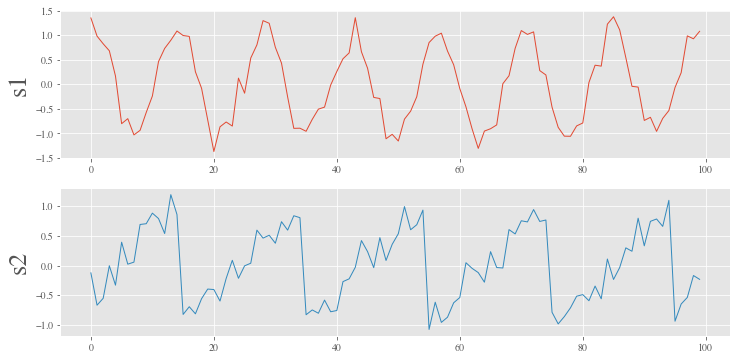

In [4]:
dtwsig.plot_signals()
plt.show()

DTW distance between signals: 4.8915


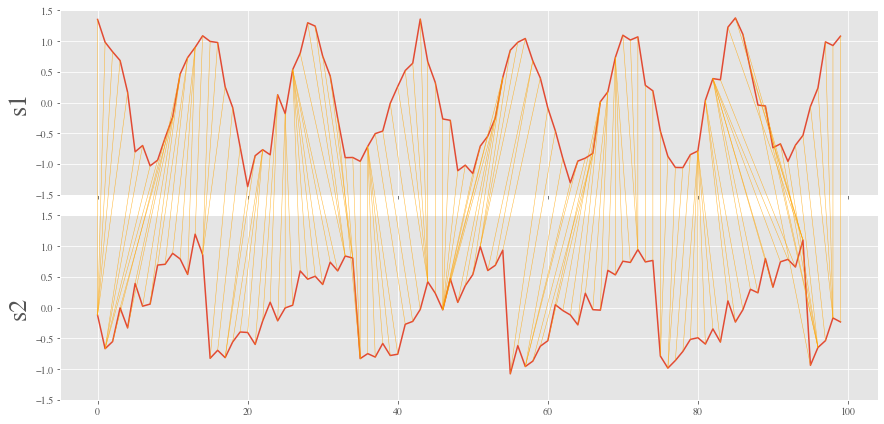

In [5]:
distance,_,_ = dtwsig.plot_warping_path()
print(f"DTW distance between signals: {distance:.4f}")

plt.show()

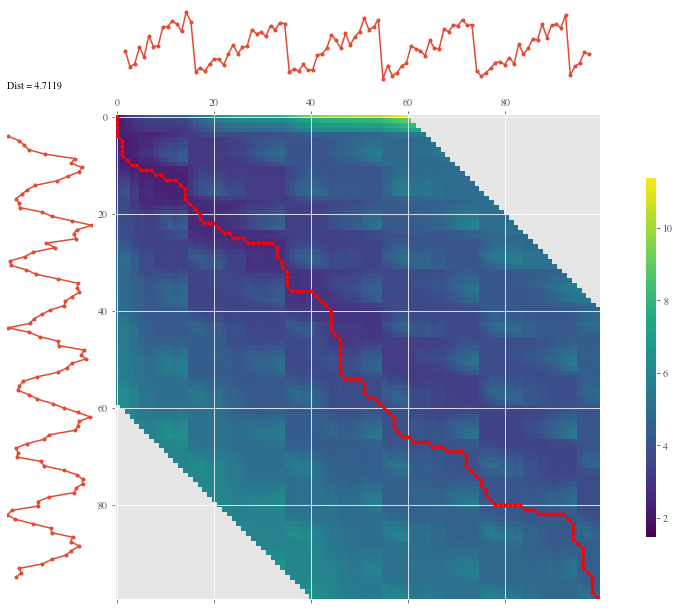

In [6]:
dtwsig.plot_matrix(windowfrac=0.6, psi=None) #Only allow for shifts up to 60% of the minimum signal length away from the two diagonals.
plt.show()

## DTW analysis for multiple signals

Let's create five signals

In [7]:
fs = 100   # sampling rate, in Hz
T  = 1      # duration, in seconds

N  = T * fs # duration, in samples
M  = 5      # number of sources
S1 = np.sin(2 * np.pi * t * 7)
S2 = signal.sawtooth(2 * np.pi * t * 5)
S3 = np.abs(np.cos(2 * np.pi * t * 3)) - 0.5
S4 = np.sign(np.sin(2 * np.pi * t * 8))
S5 = np.random.randn(N)

time_series = np.array([S1, S2, S3, S4, S5])

In [8]:
## instantiate the class
dtw_cluster = dtw_clustering(time_series)

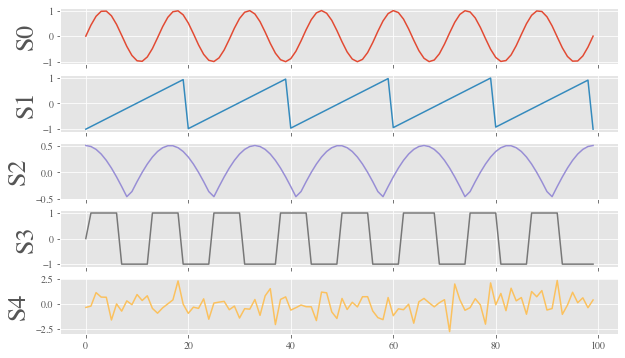

In [9]:
dtw_cluster.plot_signals()
plt.show()

### Compute the relative DTW distance between the signals

In [10]:
ds = dtw_cluster.compute_distance_matrix(compact=False)

The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
See the documentation for alternative installation options.
The compiled dtaidistance C-OMP library is not available.
Using the Python multiprocessing library instead (use_mp=True).
See the documentation for alternative installation options.



In [11]:
ds

array([[0.        , 5.15998322, 4.19080907, 5.77875263, 8.08639641],
       [5.15998322, 0.        , 4.74413601, 7.71110741, 8.62694903],
       [4.19080907, 4.74413601, 0.        , 8.75201301, 8.68462689],
       [5.77875263, 7.71110741, 8.75201301, 0.        , 8.82933241],
       [8.08639641, 8.62694903, 8.68462689, 8.82933241, 0.        ]])

Notice that the distance between same signals (e.g., S1 & S1) is 0. 